## Data Collection Part - Career bliss website

### Data collection using web crawling:

In [1]:
# import packages for part-2
import pandas as pd

import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

#Get Chrome driver
driver = webdriver.Chrome()

### Navigating to Web Page
Using URL of Career bliss website (https://www.careerbliss.com/apple/reviews/?page=1)

In [2]:
# driver wait 10 seconds until the page loaded
driver.implicitly_wait(10)

# Enter to the site
driver.get('https://www.careerbliss.com/apple/reviews/?page=1');
time.sleep(5)

In [3]:
# Creating function to avoid NoSuchElementException while collecting data

def get_element_text(driver, xpath):
    try:
        return driver.find_element(By.XPATH, xpath).text
    except NoSuchElementException:
        return None

def get_element_attribute(driver, xpath, attribute):
    try:
        return driver.find_element(By.XPATH, xpath).get_attribute(attribute)
    except NoSuchElementException:
        return None
# Xpath to pull data from the web
    
for i in driver.find_elements(By.XPATH, "//div[@class='company-reviews']"):
    title = get_element_text(i, "a[@class='job-title header5 twocentChromeExt']")
    review = get_element_text(i, "p[@class='comments foggy']")
    state = get_element_text(i, "div[@class='rating-container']/span/a")
    url = get_element_attribute(i, "a[@class='job-title header5 twocentChromeExt']", "href")
    person = get_element_text(i, "div[@class='rankings']/div/span[2]")
    people = get_element_text(i, "div[@class='rankings']/div/span[4]")
    work_setting = get_element_text(i, "div[@class='rankings']/div/span[6]")
    support = get_element_text(i, "div[@class='rankings']/div[2]/span[2]")
    rewards = get_element_text(i, "div[@class='rankings']/div[2]/span[4]")
    growth = get_element_text(i, "div[@class='rankings']/div[2]/span[6]")
    culture = get_element_text(i, "div[@class='rankings']/div[3]/span[2]")
   


In [4]:
# Colleting multiple page data using for loop and creating empty list to fill data

apple_review = {'job_title':[],
               'employee_review':[],
               'state':[],
               'review_url':[],
                'person_you_work_for':[],
                'people_you_work_with':[],
                'work_setting':[],
                'support':[],
                'rewards':[],
                'growth':[],
                'culture':[],
               }
                
                
def get_element_text(driver, xpath):
    try:
        return driver.find_element(By.XPATH, xpath).text
    except NoSuchElementException:
        return None

def get_element_attribute(driver, xpath, attribute):
    try:
        return driver.find_element(By.XPATH, xpath).get_attribute(attribute)
    except NoSuchElementException:
        return None
    
# Initialize the page counter
page_counter = 0
max_pages = 5

while page_counter < max_pages:
    for i in driver.find_elements(By.XPATH, "//div[@class='company-reviews']"):
        title = get_element_text(i, "a[@class='job-title header5 twocentChromeExt']")
        review = get_element_text(i, "p[@class='comments foggy']")
        state = get_element_text(i, "div[@class='rating-container']/span/a")
        url = get_element_attribute(i, "a[@class='job-title header5 twocentChromeExt']", "href")
        person = get_element_text(i, "div[@class='rankings']/div/span[2]")
        people = get_element_text(i, "div[@class='rankings']/div/span[4]")
        work_setting = get_element_text(i, "div[@class='rankings']/div/span[6]")
        support = get_element_text(i, "div[@class='rankings']/div[2]/span[2]")
        rewards = get_element_text(i, "div[@class='rankings']/div[2]/span[4]")
        growth = get_element_text(i, "div[@class='rankings']/div[2]/span[6]")
        culture = get_element_text(i, "div[@class='rankings']/div[3]/span[2]")
        
        
        # Extract and append data to the dictionary

        apple_review['job_title'].append(title)
        apple_review['employee_review'].append(review)
        apple_review['state'].append(state)
        apple_review['review_url'].append(url)
        apple_review['person_you_work_for'].append(person)
        apple_review['people_you_work_with'].append(people)
        apple_review['work_setting'].append(work_setting)
        apple_review['support'].append(support)
        apple_review['rewards'].append(rewards)
        apple_review['growth'].append(growth)
        apple_review['culture'].append(culture)
        

        # Increment the page counter
    try:
        next_link = driver.find_element(By.XPATH,"//li/a[@class='btn-tertiary next-page']")
        next_link.click()
        time.sleep(5)

         # Increment the page counter
        page_counter += 1
    except:
        break

print("Data collection is done!")           
            
# Close the browser
driver.quit()


Data collection is done!


In [5]:
# Convert the dictionary to panda Dataframe

apple_reviewDF = pd.DataFrame(apple_review)
apple_reviewDF.head()

,job_title,employee_review,state,review_url,person_you_work_for,people_you_work_with,work_setting,support,rewards,growth,culture
0,None,None,None,None,None,None,None,None,None,None,None
1,Technical Specialist,"""It was a great company to work for, they defi...","Dallas, TX",https://www.careerbliss.com/apple/reviews/tech...,5 / 5,5 / 5,5 / 5,5 / 5,3 / 5,5 / 5,5 / 5
2,Apple Employee,"""Excellent place of work and a great opportuni...","Sunnyvale, CA",https://www.careerbliss.com/apple/reviews/anon...,5 / 5,4 / 5,4 / 5,5 / 5,3 / 5,5 / 5,3 / 5
3,Specialist,None,"Mission Viejo, CA",https://www.careerbliss.com/apple/reviews/spec...,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5
4,Product Service Engineering Technician,"""I was welcomed by the entire team since the b...","Cupertino, CA",https://www.careerbliss.com/apple/reviews/prod...,5 / 5,4 / 5,5 / 5,5 / 5,4 / 5,4 / 5,5 / 5


In [6]:
# Let's remove '/' & out of data which is '5' from rating columns
rating_columns = ['person_you_work_for', 'people_you_work_with', 'work_setting', 'support', 'rewards', 'growth', 'culture'] 
for col in rating_columns: apple_reviewDF[col] = apple_reviewDF[col].str.replace(' / 5', '', regex=False)
    

In [7]:
# Check correction
apple_reviewDF.head()

,job_title,employee_review,state,review_url,person_you_work_for,people_you_work_with,work_setting,support,rewards,growth,culture
0,None,None,None,None,None,None,None,None,None,None,None
1,Technical Specialist,"""It was a great company to work for, they defi...","Dallas, TX",https://www.careerbliss.com/apple/reviews/tech...,5,5,5,5,3,5,5
2,Apple Employee,"""Excellent place of work and a great opportuni...","Sunnyvale, CA",https://www.careerbliss.com/apple/reviews/anon...,5,4,4,5,3,5,3
3,Specialist,None,"Mission Viejo, CA",https://www.careerbliss.com/apple/reviews/spec...,5,5,5,5,5,5,5
4,Product Service Engineering Technician,"""I was welcomed by the entire team since the b...","Cupertino, CA",https://www.careerbliss.com/apple/reviews/prod...,5,4,5,5,4,4,5


In [8]:
# check how many rows
print(len(apple_reviewDF))

80


In [9]:
# Check for null data
apple_reviewDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_title             75 non-null     object
 1   employee_review       73 non-null     object
 2   state                 75 non-null     object
 3   review_url            75 non-null     object
 4   person_you_work_for   75 non-null     object
 5   people_you_work_with  75 non-null     object
 6   work_setting          75 non-null     object
 7   support               75 non-null     object
 8   rewards               75 non-null     object
 9   growth                75 non-null     object
 10  culture               75 non-null     object
dtypes: object(11)
memory usage: 7.0+ KB


In [10]:
# find top 5 job title
apple_reviewDF['job_title'].value_counts(ascending= False).head()

job_title
Apple Employee          31
Technical Expert         4
Technical Specialist     3
Specialist               3
Software Engineer        2
Name: count, dtype: int64

In [11]:
# find state value count
apple_reviewDF['state'].value_counts()

state
Sunnyvale, CA           19
Cupertino, CA           14
Austin, TX               5
New York City, NY        5
San Jose, CA             4
Elk Grove, CA            3
Dallas, TX               2
Santa Clara, CA          2
Denver, CO               2
San Francisco, CA        2
Charlotte, NC            1
Modesto, CA              1
Rancho Cucamonga, CA     1
Buford, GA               1
McKeesport, PA           1
Chicago, IL              1
White Plains, NY         1
California City, CA      1
Talladega, AL            1
San Diego, CA            1
South Windsor, CT        1
Raleigh, NC              1
Jacksonville, FL         1
Fremont, CA              1
Santa Barbara, CA        1
Mission Viejo, CA        1
Chandler, AZ             1
Name: count, dtype: int64

In [12]:
# Drop na value
apple_reviewDF.dropna().head(2)

,job_title,employee_review,state,review_url,person_you_work_for,people_you_work_with,work_setting,support,rewards,growth,culture
1,Technical Specialist,"""It was a great company to work for, they defi...","Dallas, TX",https://www.careerbliss.com/apple/reviews/tech...,5,5,5,5,3,5,5
2,Apple Employee,"""Excellent place of work and a great opportuni...","Sunnyvale, CA",https://www.careerbliss.com/apple/reviews/anon...,5,4,4,5,3,5,3


In [13]:
# Converting rating columns to numeric columns
num_columns = ['person_you_work_for', 'people_you_work_with', 'work_setting', 'support', 'rewards', 'growth', 'culture']
apple_reviewDF[num_columns] = apple_reviewDF[num_columns].apply(pd.to_numeric, errors='coerce')


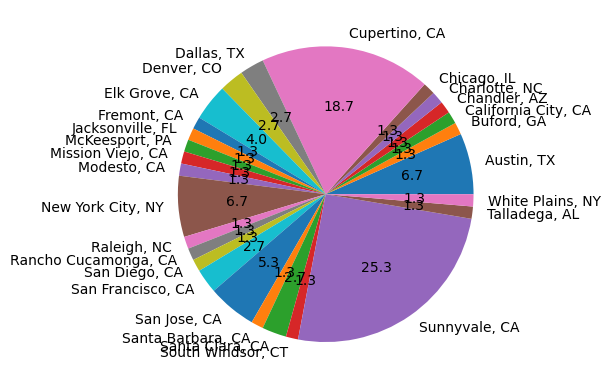

In [14]:
# pie chart for state 
apple_reviewDF.groupby('state').size().plot(kind='pie',autopct='%.1f');

In [15]:
avg_rating = apple_reviewDF[num_columns].mean()

print("Average ratings for each column:")
print(avg_rating)

Average ratings for each column:
person_you_work_for     4.560000
people_you_work_with    4.640000
work_setting            4.466667
support                 4.466667
rewards                 4.186667
growth                  4.053333
culture                 4.373333
dtype: float64


In [16]:
# Convert data to CSV file
apple_reviewDF.to_csv("apple_reviewDF.csv", index=False)

### Data collection using APIs: Reddit

In [2]:
# import packages for part-3
import praw
import pandas as pd
import datetime
from pprint import pprint # pretty print

In [3]:
# Reddit scraping app information
reddit = praw.Reddit(client_id='Ke2xLrIzV6yeySewoMGCTQ', 
                     client_secret='lEMrMKkSe3d1bwUJZ3OX-pCsmmwzaQ', 
                     user_agent='MIS670_NiraliShah'                    
                    )

Version 7.7.1 of praw is outdated. Version 7.8.1 was released Friday October 25, 2024.


In [4]:
# get one hot post from the jobs subreddit
hot_posts = reddit.subreddit('jobs').hot(limit=1)
for post in hot_posts:
    pprint(vars(post))  

{'_additional_fetch_params': {},
 '_comments_by_id': {},
 '_fetched': False,
 '_reddit': <praw.reddit.Reddit object at 0x0000020707737590>,
 'all_awardings': [],
 'allow_live_comments': False,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='AutoModerator'),
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_6l4z3',
 'author_is_blocked': False,
 'author_patreon_flair': False,
 'author_premium': True,
 'awarders': [],
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'category': None,
 'clicked': False,
 'comment_limit': 2048,
 'comment_sort': 'confidence',
 'content_categories': None,
 'contest_mode': False,
 'created': 1719788411.0,
 'created_utc': 1719788411.0,
 'discussion_type': None,
 'distinguished

In [5]:
# get 10 hot posts from the jobs subreddit
hot_posts = reddit.subreddit('jobs').hot(limit=10)
for post in hot_posts:
    print(post.title,post.url)

Success and Disappointment Megathread for the Week https://www.reddit.com/r/jobs/comments/1dse341/success_and_disappointment_megathread_for_the_week/
Success and Disappointment Megathread for the Week https://www.reddit.com/r/jobs/comments/1gz5fsn/success_and_disappointment_megathread_for_the_week/
Nepotism: The Ultimate Cheat Code to Career Success https://i.redd.it/eihccqoznh3e1.png
Got rejected after 5 rounds. Was 3rd and they wanted 2 people. I’m honestly just tired https://i.redd.it/mw2b34u8ag3e1.jpeg
Why is it so hard to get a job? https://www.reddit.com/r/jobs/comments/1h19wib/why_is_it_so_hard_to_get_a_job/
Is my outfit fit for my first interview? https://i.redd.it/hy2qulwkhh3e1.jpeg
It's not that simple https://i.redd.it/pgzbzgb3m83e1.png
I can’t get a job, what do I do? https://www.reddit.com/r/jobs/comments/1h19mj9/i_cant_get_a_job_what_do_i_do/
When starting a new job, what’s the one “red flag” that made you say “Nah, I gotta get outta here”? https://www.reddit.com/r/jobs/c

In [6]:
# Collecting useful data from reddit post
posts = []

job_subreddit = reddit.subreddit('jobs')

for post in job_subreddit.hot(limit=10):
    posts.append([post.title, 
                  post.id, 
                  post.subreddit, 
                  post.url, 
                  post.num_comments, 
                  post.selftext, 
                  post.created])
    
posts = pd.DataFrame(posts, columns=['title', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts.head()

,title,id,subreddit,url,num_comments,body,created
0,Success and Disappointment Megathread for the ...,1dse341,jobs,https://www.reddit.com/r/jobs/comments/1dse341...,258,This is the weekly success and disappointment...,1.719788e+09
1,Success and Disappointment Megathread for the ...,1gz5fsn,jobs,https://www.reddit.com/r/jobs/comments/1gz5fsn...,6,This is the weekly success and disappointment...,1.732493e+09
2,Nepotism: The Ultimate Cheat Code to Career Su...,1h1bn4w,jobs,https://i.redd.it/eihccqoznh3e1.png,6,,1.732733e+09
3,Got rejected after 5 rounds. Was 3rd and they ...,1h14xjq,jobs,https://i.redd.it/mw2b34u8ag3e1.jpeg,79,In the unlikely event that one of the two sele...,1.732716e+09
4,Why is it so hard to get a job?,1h19wib,jobs,https://www.reddit.com/r/jobs/comments/1h19wib...,52,I've applied to what feels like a million plac...,1.732729e+09


In [7]:
# Convert the 'created' column to datetime
posts['created_date'] = posts['created'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
posts.head()

,title,id,subreddit,url,num_comments,body,created,created_date
0,Success and Disappointment Megathread for the ...,1dse341,jobs,https://www.reddit.com/r/jobs/comments/1dse341...,258,This is the weekly success and disappointment...,1.719788e+09,2024-06-30 23:00:11
1,Success and Disappointment Megathread for the ...,1gz5fsn,jobs,https://www.reddit.com/r/jobs/comments/1gz5fsn...,6,This is the weekly success and disappointment...,1.732493e+09,2024-11-25 00:00:16
2,Nepotism: The Ultimate Cheat Code to Career Su...,1h1bn4w,jobs,https://i.redd.it/eihccqoznh3e1.png,6,,1.732733e+09,2024-11-27 18:46:52
3,Got rejected after 5 rounds. Was 3rd and they ...,1h14xjq,jobs,https://i.redd.it/mw2b34u8ag3e1.jpeg,79,In the unlikely event that one of the two sele...,1.732716e+09,2024-11-27 13:59:50
4,Why is it so hard to get a job?,1h19wib,jobs,https://www.reddit.com/r/jobs/comments/1h19wib...,52,I've applied to what feels like a million plac...,1.732729e+09,2024-11-27 17:35:19


In [8]:
# how many posts from each subreddit? 
posts['subreddit'].value_counts()

subreddit
jobs    10
Name: count, dtype: int64

In [9]:
# let's remove rows with less than 5 comments (or replies)

posts = posts[posts['num_comments'] >= 5]
posts.head()

,title,id,subreddit,url,num_comments,body,created,created_date
0,Success and Disappointment Megathread for the ...,1dse341,jobs,https://www.reddit.com/r/jobs/comments/1dse341...,258,This is the weekly success and disappointment...,1.719788e+09,2024-06-30 23:00:11
1,Success and Disappointment Megathread for the ...,1gz5fsn,jobs,https://www.reddit.com/r/jobs/comments/1gz5fsn...,6,This is the weekly success and disappointment...,1.732493e+09,2024-11-25 00:00:16
2,Nepotism: The Ultimate Cheat Code to Career Su...,1h1bn4w,jobs,https://i.redd.it/eihccqoznh3e1.png,6,,1.732733e+09,2024-11-27 18:46:52
3,Got rejected after 5 rounds. Was 3rd and they ...,1h14xjq,jobs,https://i.redd.it/mw2b34u8ag3e1.jpeg,79,In the unlikely event that one of the two sele...,1.732716e+09,2024-11-27 13:59:50
4,Why is it so hard to get a job?,1h19wib,jobs,https://www.reddit.com/r/jobs/comments/1h19wib...,52,I've applied to what feels like a million plac...,1.732729e+09,2024-11-27 17:35:19


In [11]:
reddit_posts = pd.DataFrame(posts)
reddit_posts.to_csv("reddit_posts.csv",index=False)

In [25]:
# Geting comments from a specific psot
url = "https://www.reddit.com/r/jobs/comments/1gwg1ke/pto_request_denied_before_holiday/"
submission = reddit.submission(url=url)

In [26]:
toplevelcomments = []

submission.comments.replace_more(limit=None)    # limit=None
for top_level_comment in submission.comments:
    print(top_level_comment.body, top_level_comment.created)
    toplevelcomments.append([])

Go spend time with your family! Time with family is more important than one day's pay. 1732208702.0
From what I have heard a lot of companies don't pay for the holiday if someone calls out the day before or the day after the holiday. I think the policy makes sense. I haven't ever had to enforce it. I did have someone try to call out the day before Thanksgiving. I reminded them about the policy of not getting paid for the holiday if you call out the day before or after. We pay for Thanksgiving and the day after. Once the employee was reminded about not getting paid for the days, he magically felt better and came into work. 1732197040.0
Not all jobs recquire you to have PTO to take a day off, does yours?

Also yeah, every job I've ever had if you call in you do not get the holiday time. It's unfortunately normal.telling your coworker you were planning on doing that was also really dumb, they can rat you out. 1732196810.0
My company has a use it or lose it policy but allows 5 days to roll

In [27]:
# Replays to that comments
secondlevelcomments = []

submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    for second_level_comment in top_level_comment.replies:
        print(second_level_comment.body)
        secondlevelcomments.append(second_level_comment.body)

Where I worked, the rule was that you had to have *a paid day* before and after the holiday. So if you called in sick and had available PTO, that would count.
Did he "magically" feel better or did he feel financially forced to come in despite not feeling well? People do get sick around the holidays despite how inconvenient it is for businesses.
I told my manager I had AIDS and ever since then i can take any day off.
Our company gives you an option to take a day off the day before or after Xmas and Thanksgiving. It won't roll over to or from the week after or before because of a weekend. You have to work out the days with your store or department though. But everyone gets a floater day.
I get paid for Thanksgiving but I won’t work thanksgiving. Is that not common)
She is referring to g to the day before the holiday. Stating if she calls out on Christmas Eve, won’t get paid holiday pay for Christmas Day. Just another way for US businesses to control their employees. At least not all comp

In [28]:
# Setting created_date as index for sample to use as time series data
posts.set_index('created_date',inplace=True)
posts.head()

,title,id,subreddit,url,num_comments,body,created
created_date,,,,,,,
2024-06-30 23:00:11,Success and Disappointment Megathread for the ...,1dse341,jobs,https://www.reddit.com/r/jobs/comments/1dse341...,255,This is the weekly success and disappointment...,1.719788e+09
2024-11-21 20:26:34,Anybody just burnt out from applying but also ...,1gwpd8k,jobs,https://www.reddit.com/r/jobs/comments/1gwpd8k...,51,Been unemployed for a year & some change….Look...,1.732221e+09
2024-11-21 18:31:50,Being harassed by someone on indeed,1gwmib9,jobs,https://www.reddit.com/gallery/1gwmib9,93,So for context …\n\nThis person messages me on...,1.732214e+09
2024-11-21 12:25:03,I understand accepting a lower salary in excha...,1gwf1x2,jobs,https://i.redd.it/p5fb4ofez82e1.jpeg,17,,1.732192e+09
2024-11-21 13:17:36,PTO Request denied before holiday.,1gwg1ke,jobs,https://www.reddit.com/r/jobs/comments/1gwg1ke...,70,I live in NY. \n\nI requested Vacation in Marc...,1.732195e+09


In [29]:
# let's see number of comments per year
posts.resample('M').size()

C:\Users\niral\AppData\Local\Temp\ipykernel_46212\623285673.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  posts.resample('M').size()


created_date
2024-06-30    1
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
2024-11-30    8
Freq: ME, dtype: int64

C:\Users\niral\AppData\Local\Temp\ipykernel_46212\2826092017.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  posts.resample('M').size().plot(kind='bar');


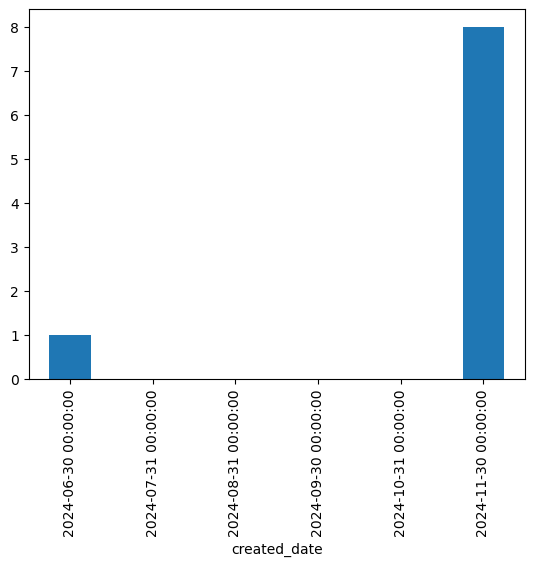

In [30]:
# create a bar chart to visualize the number of comments "per year" ('YE')
posts.resample('M').size().plot(kind='bar');